In [ ]:
#mount gdrive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#filepath
fp = '/content/drive/MyDrive/Deep learning/diabetes.csv'

In [ ]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import plotly.figure_factory as ff
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials


In [ ]:
data = pd.read_csv(fp)

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


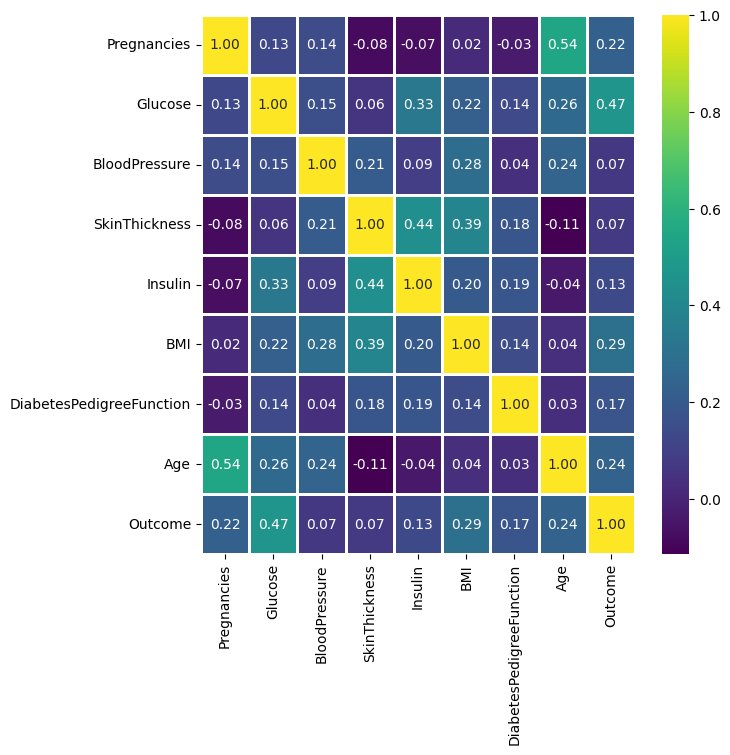

In [ ]:
#checking correlation between features
plt.figure(figsize=(7, 7))
sns.heatmap(data.corr(), annot = True, linewidths=2, cmap='viridis', fmt='.2f', cbar=True)
plt.show()

In [ ]:
corr_report = data.corr()['Outcome']
print(corr_report)

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64


In [ ]:
#check for null values
data.isna().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [ ]:
#replace zero values with np.nan to visualize them
colname = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in colname:
  data[col].replace(0, np.nan, inplace=True)

In [ ]:
#check for null values
data.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
#imputing mean instead of null values
for col in colname:
    data[col].replace(np.nan, data[col].mean(), inplace=True)

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
input = data.iloc[:,0:8]
outcome = data.iloc[:,8]
x,y = input,outcome
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [ ]:
def accuracy(classifier, X_train=x_train, y_train=y_train,
              X_test=x_test, y_test=y_test):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    acc_score = accuracy_score(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    return acc_score

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp= MLPClassifier(random_state=0)
mlp_acc = accuracy(mlp)

              precision    recall  f1-score   support

           0       0.83      0.73      0.78       130
           1       0.55      0.69      0.61        62

    accuracy                           0.72       192
   macro avg       0.69      0.71      0.70       192
weighted avg       0.74      0.72      0.73       192



In [ ]:
clf = MLPClassifier()


param_options = {
    'hidden_layer_sizes': [(50, 30), (100, 50), (100,)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'lbfgs'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'max_iter': randint(100, 500),
}


random_search = RandomizedSearchCV(clf, param_distributions=param_options, n_iter=10, cv=5)

random_search.fit(x_train, y_train)
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print( best_params)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

{'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'max_iter': 305, 'solver': 'adam'}


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (305) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
print(best_model)

MLPClassifier(activation='tanh', alpha=0.01, learning_rate='adaptive',
              max_iter=305)


In [ ]:
from sklearn.neural_network import MLPClassifier
mlp= MLPClassifier(activation='tanh', max_iter=15000, alpha=0.0001,hidden_layer_sizes=(100,), learning_rate='constant',solver= 'adam', early_stopping=True,)
mlp_acc = accuracy(mlp)

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       130
           1       0.59      0.47      0.52        62

    accuracy                           0.72       192
   macro avg       0.68      0.66      0.66       192
weighted avg       0.71      0.72      0.71       192



In [ ]:

param_lst = {
    'hidden_layer_sizes': hp.choice('hidden_layer_sizes', [(50,), (100,), (50, 50), (100, 100)]),
    'activation': hp.choice('activation', ['relu', 'tanh']),
    'alpha': hp.loguniform('alpha', -6, -2),
    'learning_rate_init': hp.loguniform('learning_rate_init', -4, -1),
    'max_iter': hp.choice('max_iter', [1000])
}

def objective(params):
    clf = MLPClassifier(
        hidden_layer_sizes=params['hidden_layer_sizes'],
        activation=params['activation'],
        alpha=params['alpha'],
        learning_rate_init=params['learning_rate_init'],
        max_iter=params['max_iter'],
        random_state=0
    )


    cv_scores = cross_val_score(clf, x_train, y_train, cv=5)
    average_accuracy = np.mean(cv_scores)

    return {'loss': -average_accuracy, 'status': STATUS_OK}


trials = Trials()


best = fmin(fn=objective,
            space=param_lst,
            algo=tpe.suggest,
            max_evals=100,
            trials=trials)

print(best)

100%|██████████| 100/100 [03:16<00:00,  1.96s/trial, best loss: -0.7534332833583208]
{'activation': 0, 'alpha': 0.01311377424056639, 'hidden_layer_sizes': 3, 'learning_rate_init': 0.03351298700059245, 'max_iter': 0}


In [ ]:
mlp = MLPClassifier(activation='tanh', max_iter=200, alpha=0.06717081543736342,hidden_layer_sizes=(3,),learning_rate_init= 0.04235869959640947)
mlp_acc = accuracy(mlp, x_train, y_train, x_test,y_test)

              precision    recall  f1-score   support

           0       0.68      1.00      0.81       130
           1       0.00      0.00      0.00        62

    accuracy                           0.68       192
   macro avg       0.34      0.50      0.40       192
weighted avg       0.46      0.68      0.55       192



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
mlp = MLPClassifier(random_state=0)
mlp_acc = accuracy(mlp, x_train, y_train, x_test,y_test)

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       130
           1       0.75      0.61      0.67        62

    accuracy                           0.81       192
   macro avg       0.79      0.76      0.77       192
weighted avg       0.80      0.81      0.80       192



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
